# Step 0: Import libraries and Dataset

This project aims to assist patients in managing their blood glucose levels by determining the optimal insulin dose for them. The project involves several key stages, including examining and analyzing the dataset, followed by training a model to predict the most effective insulin dosage. By leveraging data analytics and machine learning techniques, the goal is to provide personalized insulin recommendations to improve diabetes management and patient outcomes.



In [3]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

import warnings
warnings.filterwarnings('ignore')


# Step 1: Descriptive Statistics

In [4]:

df= pd.read_excel("my_dataset.xlsx")
df.head()

,hour,meal,preprandial,preprandial_insulin,postprandial,postprandial_insulin
0,6.0,breakfast,172,5,66,0
1,12.0,lunch,127,0,82,0
2,18.0,dinner,142,2,126,0
3,6.0,breakfast,218,9,152,1
4,12.0,lunch,187,6,82,0


In [6]:
# Dataset dimensions - (rows, columns)
df.shape

(102, 6)

In [7]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour                  102 non-null    float64
 1   meal                  102 non-null    object 
 2   preprandial           102 non-null    int64  
 3   preprandial_insulin   102 non-null    int64  
 4   postprandial          102 non-null    int64  
 5   postprandial_insulin  102 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.9+ KB


In [8]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,102.0,12.000000,4.923172,6.0,6.00,12.0,18.00,18.0
preprandial,102.0,163.372549,53.476546,70.0,121.75,166.0,210.00,249.0
preprandial_insulin,102.0,4.666667,4.294443,0.0,0.00,4.0,9.00,12.0
postprandial,102.0,160.549020,58.427348,60.0,109.25,164.5,212.75,250.0
postprandial_insulin,102.0,3.519608,3.717048,0.0,0.00,2.0,7.00,11.0


In [9]:
# Count of null values
df.isnull().sum()

hour                    0
meal                    0
preprandial             0
preprandial_insulin     0
postprandial            0
postprandial_insulin    0
dtype: int64

# Step 2: Data Visualization

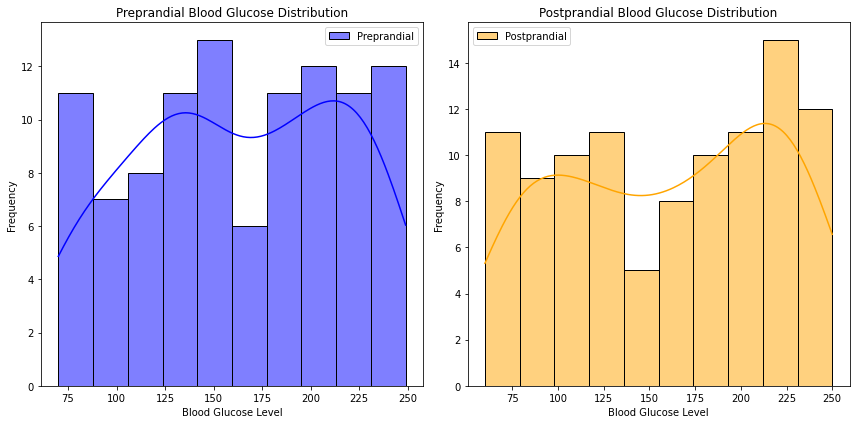

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['preprandial'], bins=10, kde=True, color='blue', label='Preprandial')
plt.title('Preprandial Blood Glucose Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df['postprandial'], bins=10, kde=True, color='orange', label='Postprandial')
plt.title('Postprandial Blood Glucose Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


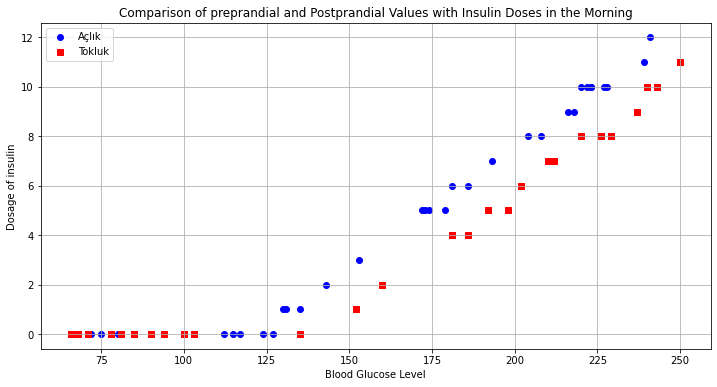

In [39]:
# Splitting meals
sabah = df[df['meal'] == 'breakfast']
ogle = df[df['meal'] == 'lunch']
aksam = df[df['meal'] == 'dinner']

# Graphics for breakfast
plt.figure(figsize=(12, 6))
plt.scatter(sabah['preprandial'], sabah['preprandial_insulin'], color='blue', label='Açlık', marker='o')
plt.scatter(sabah['postprandial'], sabah['postprandial_insulin'], color='red', label='Tokluk', marker='s')
plt.title('Comparison of preprandial and Postprandial Values with Insulin Doses in the Morning')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Dosage of insulin')
plt.legend()
plt.grid(True)
plt.show()


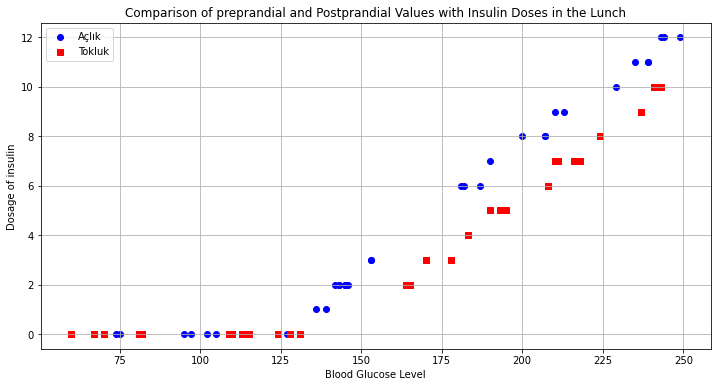

In [37]:
# Graphics for lunch
plt.figure(figsize=(12, 6))
plt.scatter(ogle['preprandial'], ogle['preprandial_insulin'], color='blue', label='Açlık', marker='o')
plt.scatter(ogle['postprandial'], ogle['postprandial_insulin'], color='red', label='Tokluk', marker='s')
plt.title('Comparison of preprandial and Postprandial Values with Insulin Doses in the Lunch')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Dosage of insulin')
plt.legend()
plt.grid(True)
plt.show()


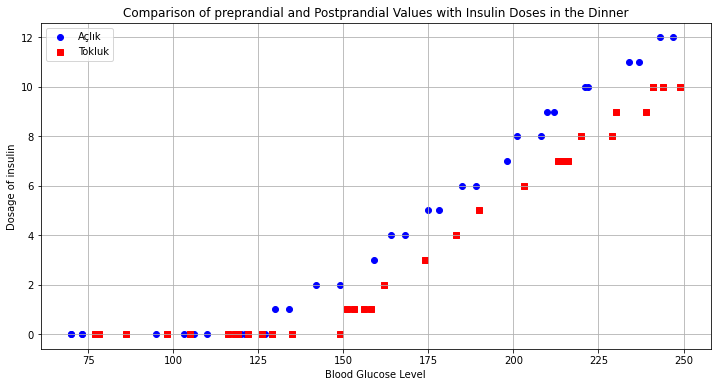

In [40]:
# Graphics for dinner
plt.figure(figsize=(12, 6))
plt.scatter(aksam['preprandial'], aksam['preprandial_insulin'], color='blue', label='Açlık', marker='o')
plt.scatter(aksam['postprandial'], aksam['postprandial_insulin'], color='red', label='Tokluk', marker='s')
plt.title('Comparison of preprandial and Postprandial Values with Insulin Doses in the Dinner')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Dosage of insulin')
plt.legend()
plt.grid(True)
plt.show()


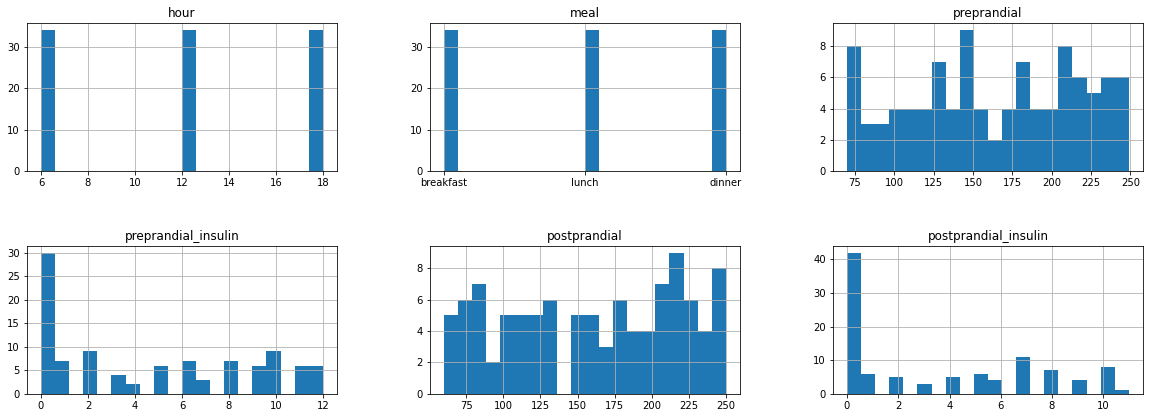

In [12]:
# Histogram of each feature
import matplotlib.pyplot as plt
import itertools

col = df.columns[:6]
plt.figure(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2) + 1, 3, j + 1)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    df[i].hist(bins=20)
    plt.title(i)

plt.show()


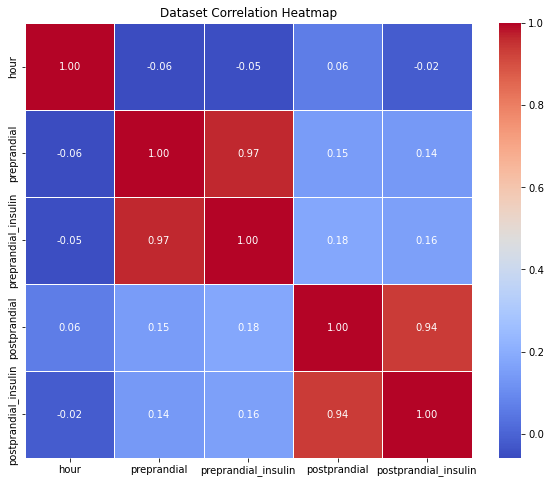

In [13]:
# Correlasyon matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Dataset Correlation Heatmap')
plt.show()


# Step 3: Data Preprocessing

In [14]:
preprandial_lower_limit = 80
preprandial_upper_limit = 130
postprandial_lower_limit = 100
postprandial_upper_limit = 160


In [44]:
def calculate_additional_insulin(preprandial, postprandial):
    additional_insulin = 0
    preprandial_upper_limit = 130
    postprandial_upper_limit = 160
    
    if preprandial > preprandial_upper_limit:
        additional_insulin += (preprandial - preprandial_upper_limit) // 10
    if postprandial > postprandial_upper_limit:
        additional_insulin += (postprandial - postprandial_upper_limit) // 10
    
    return additional_insulin


In [45]:
for index, row in df.iterrows():
    preprandial = row["preprandial"]
    postprandial = row["postprandial"]
    additional_insulin = calculate_additional_insulin(preprandial, postprandial)
    print(f"{row['hour']} - {row['meal']} - preprandial: {preprandial} - Postprandial: {postprandial} - Additional Insulin: {additional_insulin}")


6.0 - breakfast - preprandial: 172 - Postprandial: 66 - Additional Insulin: 4
12.0 - lunch - preprandial: 127 - Postprandial: 82 - Additional Insulin: 0
18.0 - dinner - preprandial: 142 - Postprandial: 126 - Additional Insulin: 1
6.0 - breakfast - preprandial: 218 - Postprandial: 152 - Additional Insulin: 8
12.0 - lunch - preprandial: 187 - Postprandial: 82 - Additional Insulin: 5
18.0 - dinner - preprandial: 95 - Postprandial: 153 - Additional Insulin: 0
6.0 - breakfast - preprandial: 153 - Postprandial: 212 - Additional Insulin: 7
12.0 - lunch - preprandial: 145 - Postprandial: 67 - Additional Insulin: 1
18.0 - dinner - preprandial: 189 - Postprandial: 119 - Additional Insulin: 5
6.0 - breakfast - preprandial: 94 - Postprandial: 229 - Additional Insulin: 6
12.0 - lunch - preprandial: 213 - Postprandial: 124 - Additional Insulin: 8
18.0 - dinner - preprandial: 70 - Postprandial: 122 - Additional Insulin: 0
6.0 - breakfast - preprandial: 173 - Postprandial: 85 - Additional Insulin: 4
1

In [46]:
df_new = df

In [47]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_new, columns=['meal'])

# apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_encoded)


In [48]:
df_scaled = pd.DataFrame(df_scaled)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features (independent variables)
X = df[['preprandial', 'postprandial']]

# Target variable (dependent variable) for preprandial insulin
y1 = df['preprandial_insulin']

# Target variable (dependent variable) for postprandial insulin
y2 = df['postprandial_insulin']

# Splitting the data into training and testing sets for y1 (preprandial_insulin)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Splitting the data into training and testing sets for y2 (postprandial_insulin)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Model creation for y1 (preprandial_insulin)
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Model creation for y2 (postprandial_insulin)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)


LinearRegression()

# Step 4: Data Modelling

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y1,y2)

LinearRegression()

Slope: 0.07760055547235721
Intercept: -8.01113388618981


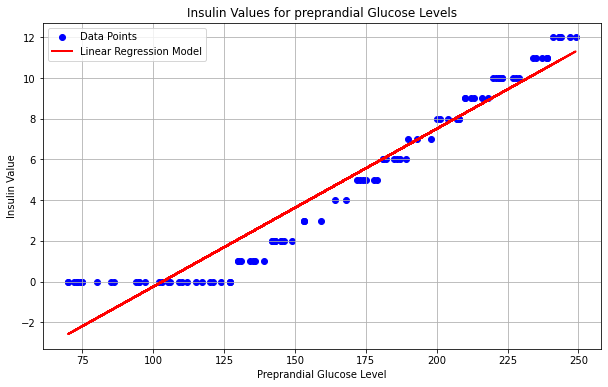

In [51]:
# Independent variable (preprandial glucose levels)
X = df['preprandial'].values.reshape(-1, 1)

# Dependent variable (insulin values)
y1 = df['preprandial_insulin']

# Model creation
model = LinearRegression()
model.fit(X, y1)

# Slope and intercept values
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Predictions
predictions = model.predict(X)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y1, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Linear Regression Model')
plt.title('Insulin Values for preprandial Glucose Levels')
plt.xlabel('Preprandial Glucose Level')
plt.ylabel('Insulin Value')
plt.legend()
plt.grid(True)
plt.show()


Slope: 0.05964194553171778
Intercept: -6.055848039484417


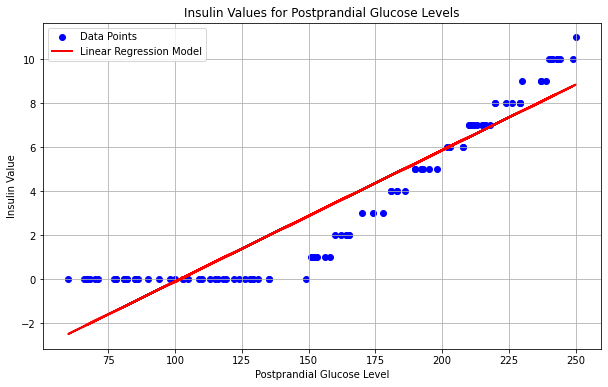

In [52]:
# Independent variable (preprandial glucose levels)
X = df['postprandial'].values.reshape(-1, 1)

# Dependent variable (insulin values)
y2 = df['postprandial_insulin']

# Model creation
model = LinearRegression()
model.fit(X, y2)

# Slope and intercept values
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Predictions
predictions = model.predict(X)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y2, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', linewidth=2, label='Linear Regression Model')
plt.title('Insulin Values for Postprandial Glucose Levels')
plt.xlabel('Postprandial Glucose Level')
plt.ylabel('Insulin Value')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
predictions = model.predict(X)
predictions = np.clip(predictions, 0, None)
df['Predicted dosage of insulin'] = np.round(predictions, 2)


In [54]:
print("\Predicted dosage of insulin:")
print(df[['hour', 'meal', 'preprandial', 'postprandial', 'Predicted dosage of insulin']])


\Predicted dosage of insulin:
     hour       meal  preprandial  postprandial  Predicted dosage of insulin
0     6.0  breakfast          172            66                         0.00
1    12.0      lunch          127            82                         0.00
2    18.0     dinner          142           126                         1.46
3     6.0  breakfast          218           152                         3.01
4    12.0      lunch          187            82                         0.00
..    ...        ...          ...           ...                          ...
97   12.0      lunch          109           128                         1.58
98   18.0     dinner          243           156                         3.25
99    6.0  breakfast          241           243                         8.44
100  12.0      lunch          181           218                         6.95
101  18.0     dinner          247            78                         0.00

[102 rows x 5 columns]


In [55]:
print(y_test1.shape, predictions.shape) 

(21,) (102,)


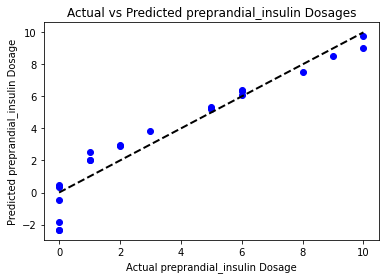

In [56]:
# Predictions for y1 (preprandial_insulin)
predictions1 = model1.predict(X_test1)

# Plot creation for y1
plt.scatter(y_test1, predictions1, color='blue')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.xlabel('Actual preprandial_insulin Dosage')
plt.ylabel('Predicted preprandial_insulin Dosage')
plt.title('Actual vs Predicted preprandial_insulin Dosages')
plt.show()


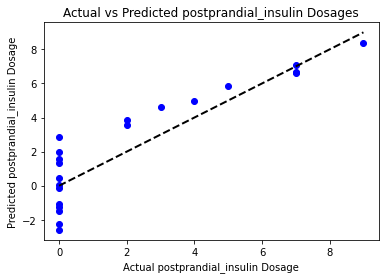

In [57]:
# Predictions for y2
predictions2 = model2.predict(X_test2)

# Plot creation for y2
plt.scatter(y_test2, predictions2, color='blue')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)
plt.xlabel('Actual postprandial_insulin Dosage')
plt.ylabel('Predicted postprandial_insulin Dosage')
plt.title('Actual vs Predicted postprandial_insulin Dosages')
plt.show()


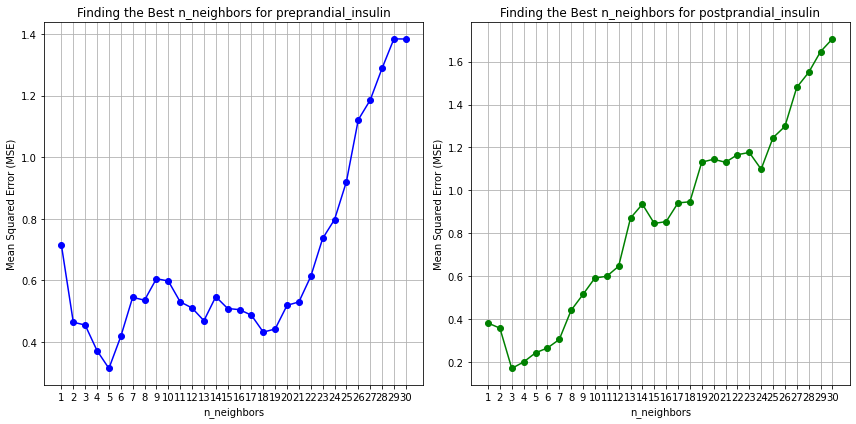

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the range of n_neighbors to test
n_neighbors = range(1, 31)

# Lists to store MSE values for y1 and y2
mse_values1 = []
mse_values2 = []

# Training and evaluating the model for different n_neighbors values
for k in n_neighbors:
    # Initialize KNN model for y1 (preprandial_insulin)
    knn_model1 = KNeighborsRegressor(n_neighbors=k)
    knn_model1.fit(X_train1, y_train1)
    predictions1 = knn_model1.predict(X_test1)
    mse1 = mean_squared_error(y_test1, predictions1)
    mse_values1.append(mse1)
    
    # Initialize KNN model for y2 (postprandial_insulin)
    knn_model2 = KNeighborsRegressor(n_neighbors=k)
    knn_model2.fit(X_train2, y_train2)
    predictions2 = knn_model2.predict(X_test2)
    mse2 = mean_squared_error(y_test2, predictions2)
    mse_values2.append(mse2)

# Plotting the results for y1 (preprandial_insulin)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_neighbors, mse_values1, marker='o', linestyle='-', color='b')
plt.title('Finding the Best n_neighbors for preprandial_insulin')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(n_neighbors)
plt.grid(True)

# Plotting the results for y2 (postprandial_insulin)
plt.subplot(1, 2, 2)
plt.plot(n_neighbors, mse_values2, marker='o', linestyle='-', color='g')
plt.title('Finding the Best n_neighbors for postprandial_insulin')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(n_neighbors)
plt.grid(True)

plt.tight_layout()
plt.show()

In [59]:
# Polynomal Regression

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df= pd.read_excel("my_dataset.xlsx")

df = pd.DataFrame(df)

# Features (independent variables)
X = df[['preprandial', 'postprandial']]

# Target variable (dependent variable) for preprandial insulin
y1 = df['preprandial_insulin']

# Target variable (dependent variable) for postprandial insulin
y2 = df['postprandial_insulin']

# Splitting the data into training and testing sets for y1 (preprandial_insulin)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Splitting the data into training and testing sets for y2 (postprandial_insulin)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Creating polynomial features
poly = PolynomialFeatures(degree=2)

# Creating polynomial features for preprandial insulin model
X_train1_poly = poly.fit_transform(X_train1)
X_test1_poly = poly.transform(X_test1)

# Creating polynomial features for postprandial insulin model
X_train2_poly = poly.fit_transform(X_train2)
X_test2_poly = poly.transform(X_test2)

# Model creation for y1 (preprandial_insulin)
model1 = LinearRegression()
model1.fit(X_train1_poly, y_train1)

# Model creation for y2 (postprandial_insulin)
model2 = LinearRegression()
model2.fit(X_train2_poly, y_train2)

# Making predictions
y1_pred = model1.predict(X_test1_poly)
y2_pred = model2.predict(X_test2_poly)

# Step 5: Model Evaluation

# lineer regression

In [61]:
# Calculate RMSE and R-squared for preprandial_insulin model (y1)
mse1 = mean_squared_error(y_test1, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test1, y1_pred)

print("RMSE for preprandial_insulin:", rmse1)
print("R-squared for preprandial_insulin:", r2_1)

# Calculate RMSE and R-squared for postprandial_insulin model (y2)
mse2 = mean_squared_error(y_test2, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test2, y2_pred)

print("RMSE for postprandial_insulin:", rmse2)
print("R-squared for postprandial_insulin:", r2_2)


RMSE for preprandial_insulin: 0.5909146927970226
R-squared for preprandial_insulin: 0.971260086449037
RMSE for postprandial_insulin: 0.47232207368851
R-squared for postprandial_insulin: 0.9747090307685358


# knn

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize KNN model for y1 (preprandial_insulin)
knn_model1 = KNeighborsRegressor(n_neighbors=5)
knn_model1.fit(X_train1, y_train1)

# Predictions for y1
predictions1 = knn_model1.predict(X_test1)

# Compute MSE for y1
mse1 = mean_squared_error(y_test1, predictions1)
print(f"Mean Squared Error for preprandial_insulin (y1): {mse1}")

# Compute R-squared for y1
r2_1 = r2_score(y_test1, predictions1)
print(f"R-squared for preprandial_insulin (y1): {r2_1}")

# Initialize KNN model for y2 (postprandial_insulin)
knn_model2 = KNeighborsRegressor(n_neighbors=3)
knn_model2.fit(X_train2, y_train2)

# Predictions for y2
predictions2 = knn_model2.predict(X_test2)

# Compute MSE for y2
mse2 = mean_squared_error(y_test2, predictions2)
print(f"\nMean Squared Error for postprandial_insulin (y2): {mse2}")

# Compute R-squared for y2
r2_2 = r2_score(y_test2, predictions2)
print(f"R-squared for postprandial_insulin (y2): {r2_2}")


Mean Squared Error for preprandial_insulin (y1): 0.3142857142857142
R-squared for preprandial_insulin (y1): 0.9741321388577827

Mean Squared Error for postprandial_insulin (y2): 0.16931216931216928
R-squared for postprandial_insulin (y2): 0.9808054841473864


# polynomial regression

In [63]:
# Evaluating model performance
mse1 = mean_squared_error(y_test1, y1_pred)
r2_1 = r2_score(y_test1, y1_pred)

mse2 = mean_squared_error(y_test2, y2_pred)
r2_2 = r2_score(y_test2, y2_pred)

print("Preprandial Insulin Model:")
print("Mean Squared Error:", mse1)
print("R-squared:", r2_1)
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)

print("\nPostprandial Insulin Model:")
print("Mean Squared Error:", mse2)
print("R-squared:", r2_2)
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)


Preprandial Insulin Model:
Mean Squared Error: 0.3491801741633995
R-squared: 0.971260086449037
Coefficients: [ 0.00000000e+00 -4.49725244e-02  7.17464657e-03  3.75865592e-04
  9.06657314e-06 -2.09845062e-05]
Intercept: 0.07828821369395023

Postprandial Insulin Model:
Mean Squared Error: 0.22308814129341425
R-squared: 0.9747090307685358
Coefficients: [ 0.00000000e+00  3.74115952e-03 -7.85548004e-02 -9.97621730e-06
 -8.83741690e-06  4.46856807e-04]
Intercept: 3.0464077478903113
